In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report
#from scipy import stats

In [62]:
df2 = pd.read_csv('Admission_Predict.csv')
df2

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [63]:
df2.isnull().count()


Serial No.           400
GRE Score            400
TOEFL Score          400
University Rating    400
SOP                  400
LOR                  400
CGPA                 400
Research             400
Chance of Admit      400
dtype: int64

In [64]:
df2.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [65]:
#OUTLIERS
#z_scores = stats.zscore(df2)
#threshold = 3
#df = df2[((z_scores < threshold) & (z_scores > -threshold)).all(axis=1)]
#df

In [66]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit        int64
dtype: object

In [67]:
def func(x):
    if x>=0.75: return 1
    else: return 0
df['Chance of Admit '] = df['Chance of Admit '].apply(func)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,1
396,325,107,3,3.0,3.5,9.11,1,1
397,330,116,4,5.0,4.5,9.45,1,1
398,312,103,3,3.5,4.0,8.78,0,0


In [48]:
#df=df.drop('Serial No.',axis=1)
#df

In [49]:
x = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research']]

y = df[['Chance of Admit ']]

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(299, 7)
(299, 1)
(100, 7)
(100, 1)


In [69]:
# Decision Tree on Gini Index criterion
model_gini = DecisionTreeClassifier(random_state=1,criterion='gini',splitter='best',max_leaf_nodes=None)
model_gini.fit(x_train,y_train)

# Decision Tree on Entropy criterion
model_entropy = DecisionTreeClassifier(random_state=1,criterion='entropy',splitter='best',max_leaf_nodes=None)
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [26]:
y_test_pred1 = model_gini.predict(x_test)
y_train_pred1 = model_gini.predict(x_train)
 
y_test_pred2 = model_entropy.predict(x_test)
y_train_pred2 = model_entropy.predict(x_train)

Accuracy Score :  0.85


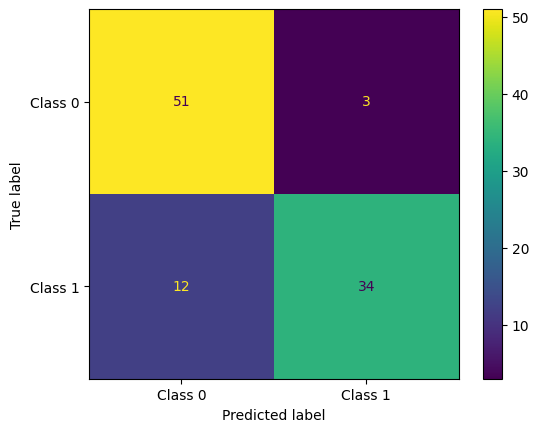

In [27]:
# Confusion Matrix Testing by Model based on GINI
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred1,display_labels=['Class 0', 'Class 1'])
plt.show
print("Accuracy Score : ",accuracy_score(y_test,y_test_pred1))

Accuracy Score :  0.84


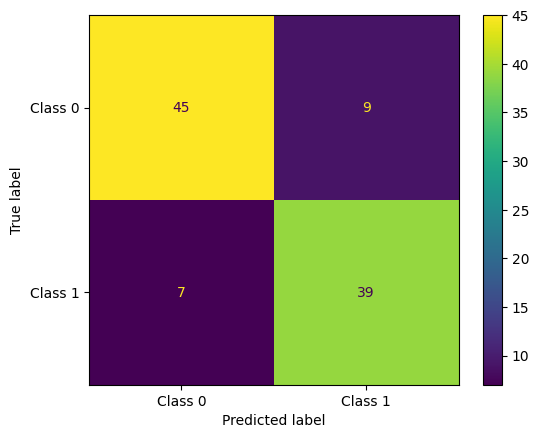

In [28]:
# Confusion Matrix Testing by Model based on ENTROPY
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred2,display_labels=['Class 0', 'Class 1'])
plt.show
print("Accuracy Score : ",accuracy_score(y_test,y_test_pred2))

Accuracy Score :  1.0


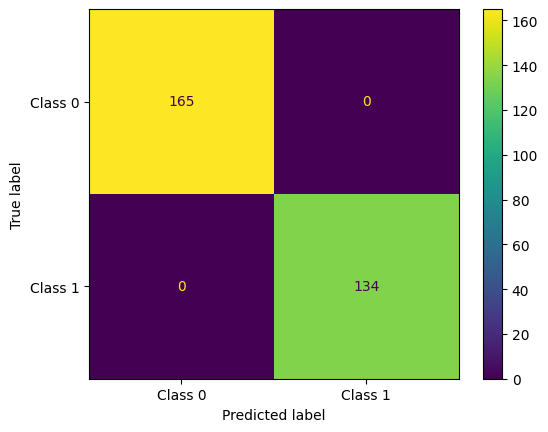

In [29]:
# Confusion Matrix Training by Model based on GINI
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred1,display_labels=['Class 0', 'Class 1'])
plt.show
print("Accuracy Score : ",accuracy_score(y_train,y_train_pred1))

Accuracy Score :  1.0


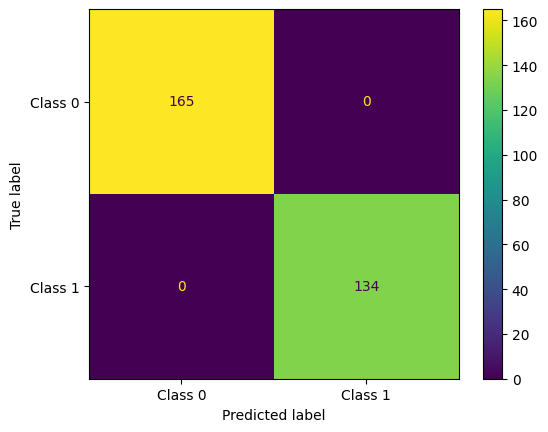

In [30]:
# Confusion Matrix Training by Model based on ENTROPY
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred2,display_labels=['Class 0', 'Class 1'])
plt.show
print("Accuracy Score : ",accuracy_score(y_train,y_train_pred2))

In [31]:
# Considering 1 as positive class & 0 as negative class

# The Confusion Matrix will be

#          Class 0   Class 1 
# Class 0 -> TN       FP
# Class 1 -> FN       TP

# TN -> It represents correctly identifying unqualified students.
# FP -> FP could result in admitting unqualified students
# FN -> FN represents missing out on qualified applicants. 
# TP -> TP represents successful predictions.

# Here the most important performance parameters should be-

# FN for students as even after they are qualified still he would not get admission
# FP for University as they fill unqualified students in their university


In [32]:
print("Confusion Matrix Testing by Model based on GINI")
print(classification_report(y_test,y_test_pred1));print()
print("Confusion Matrix Testing by Model based on ENTROPY")
print(classification_report(y_test,y_test_pred2));print()
print("Confusion Matrix Training by Model based on GINI")
print(classification_report(y_train,y_train_pred1));print()
print("Confusion Matrix Traniing by Model based on ENTROPY")
print(classification_report(y_train,y_train_pred2));print()

Confusion Matrix Testing by Model based on GINI
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        54
           1       0.92      0.74      0.82        46

    accuracy                           0.85       100
   macro avg       0.86      0.84      0.85       100
weighted avg       0.86      0.85      0.85       100


Confusion Matrix Testing by Model based on ENTROPY
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        54
           1       0.81      0.85      0.83        46

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100


Confusion Matrix Training by Model based on GINI
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       134

    accuracy                    

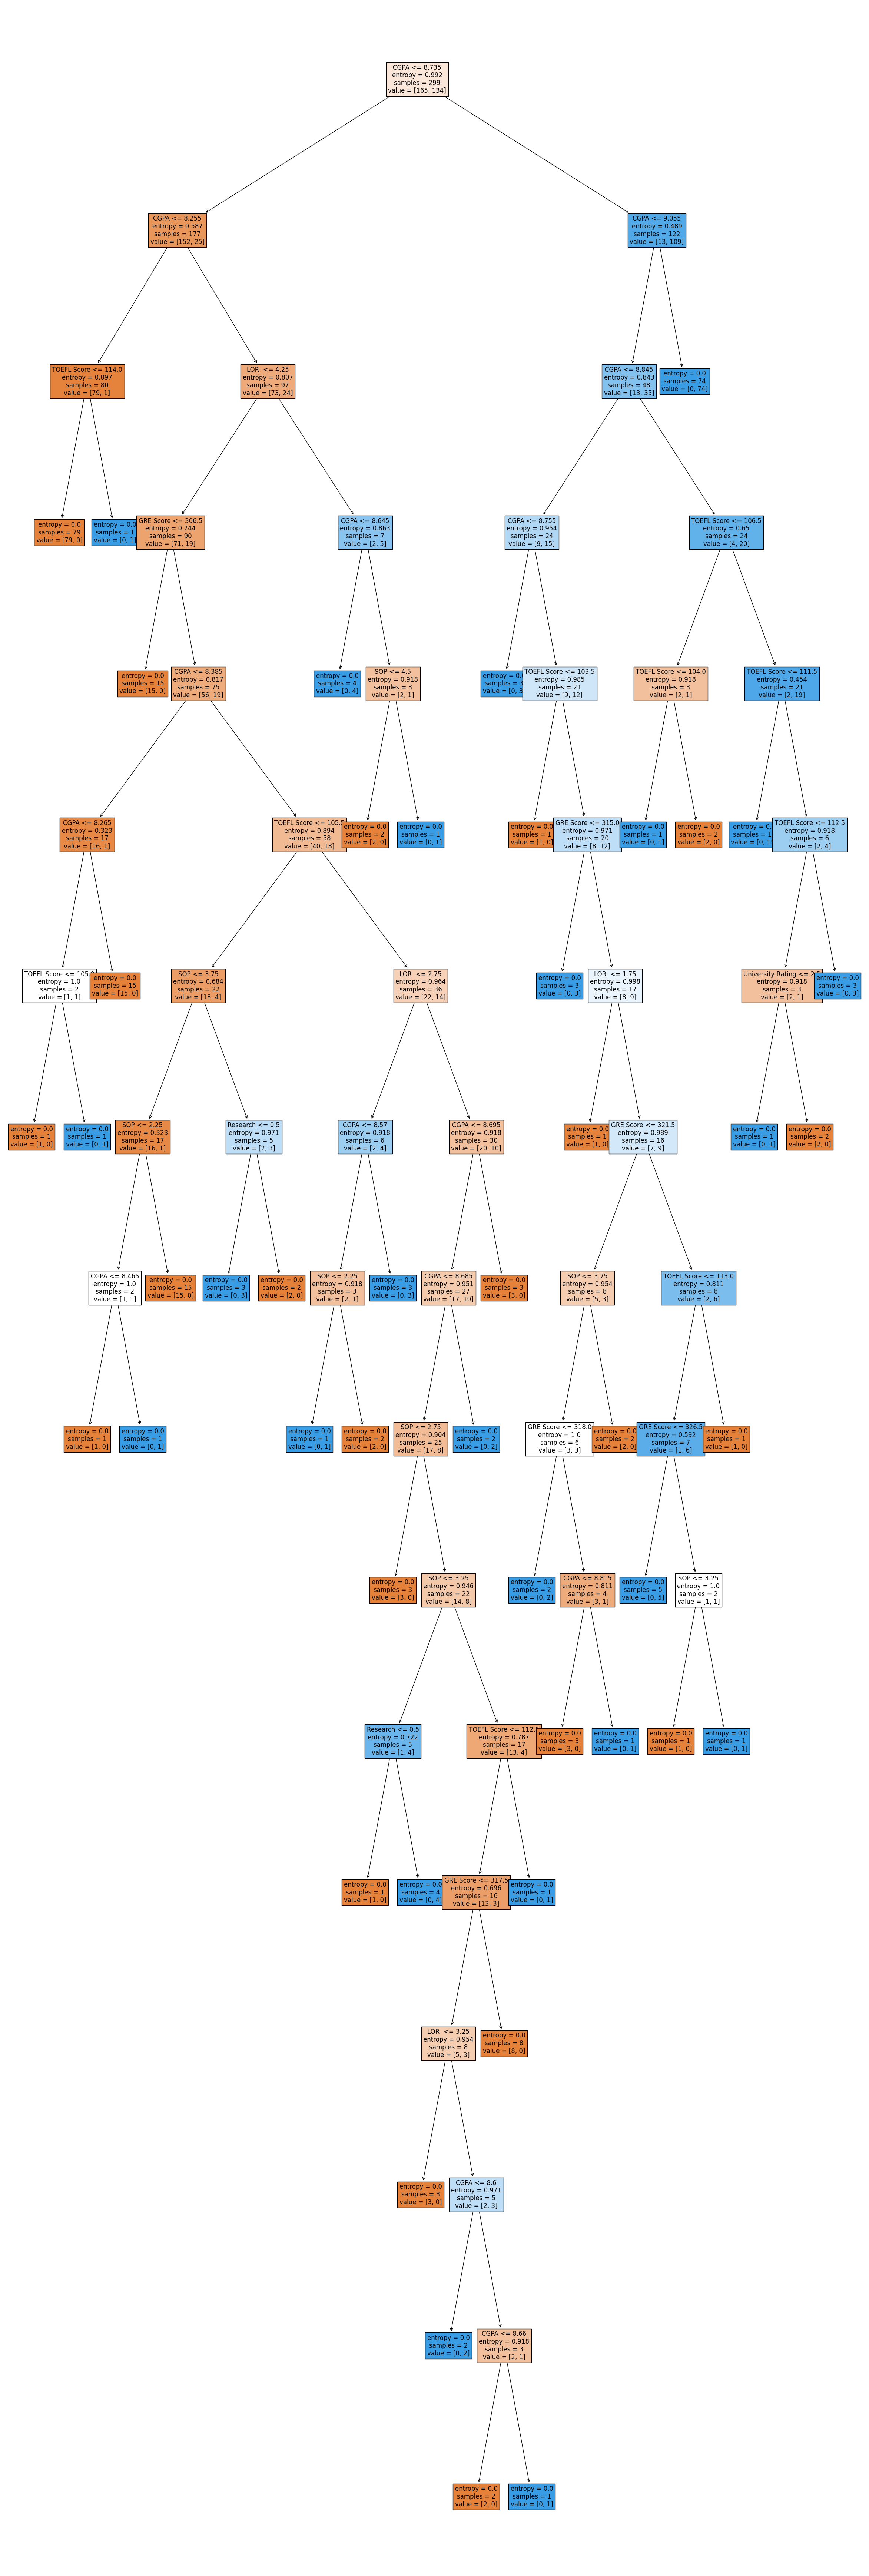

In [59]:
plt.figure(figsize=(30,90))
plot_tree(model_entropy,fontsize=12,filled=True,feature_names=list(x.columns));